In [1]:
import numpy as np
import pickle
import os
import sys

In [2]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfu
import my_data_process_utils as mdpu

In [3]:
def process_annot_line(line):
    line = line.replace("DR","11").replace("DL","12")
    line = line.replace("PR","21").replace("PL","22")    
    line = line.replace("NR","31").replace("NL","32")
    line = line.replace("I","1").replace("Q","2")
    line = line.replace("C","-1").replace("S","-2").replace("M","-3").replace('X', '-100')    
    
    v = line.rstrip().split(',')    
    v = [float(x) for x in v]
    return v

In [4]:
def process_bite_annots(filepath):
    a = open(filepath).readlines()
    a = [process_annot_line(line) for line in a]
    a = np.array(a)
    drink_duration = a[a[:, 2]==2, 1]
    delivery_duration = a[(a[:, 2]==11)|(a[:, 2]==12), 1]
    
    return drink_duration, delivery_duration
    

In [7]:
#read_data_steven_lab

path = 'C:/ASM/PublicData/eating_steventech/lab'
sampling_rate = 16 #Hz
data = []

drink, delivery = np.empty((0, )), np.empty((0, ))
for subj in range(7):
    dsubject=[]
    for sess in range(2):
        if subj==1 and sess==1:
            continue

                
        filepath= path + "/0" + str(subj) + "/000" + str(sess) + "/annot_events.csv";
        drk, deliv = process_bite_annots(filepath)
        drink = np.concatenate((drink, drk))
        delivery= np.concatenate((delivery, deliv))
        print("Subject, Sess ", subj, sess, ";", np.mean(drk), np.max(drk), ";", np.mean(deliv), np.max(deliv),)
        

Subject, Sess  0 0 ; 1.1814636224023694 2.635 ; 0.8926622757054755 3.13464506173
Subject, Sess  0 1 ; 1.3173107259625847 3.0995 ; 1.2941414382160625 4.8
Subject, Sess  1 0 ; 1.6682000000000001 2.35 ; 0.8677961743367619 2.53627021212
Subject, Sess  2 0 ; 1.8193749999999997 3.235 ; 0.9531606236663387 1.9495
Subject, Sess  2 1 ; 1.4793055555555554 3.3655 ; 1.0807532335336667 2.93050725106
Subject, Sess  3 0 ; 1.875933776073793 2.967 ; 0.7541742229256891 2.016
Subject, Sess  3 1 ; 3.2079253156800007 6.101 ; 1.0006821288866867 2.534
Subject, Sess  4 0 ; 2.5326694893589616 13.25 ; 1.1287513125812807 3.733
Subject, Sess  4 1 ; 2.383918306637906 8.1465 ; 1.0645529302599122 5.465
Subject, Sess  5 0 ; 2.812791386986111 7.7495 ; 0.8166085864301817 3.73910997253
Subject, Sess  5 1 ; 3.2861403508768423 7.01666666667 ; 0.9528747830690532 2.8
Subject, Sess  6 0 ; 3.1954905587308335 5.983 ; 1.370461888613869 4.40461329523
Subject, Sess  6 1 ; 2.7824 3.7 ; 1.3811776945507754 3.065


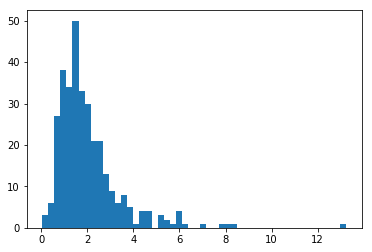

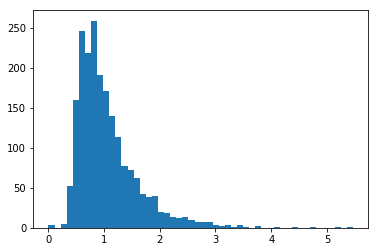

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(drink, bins=50)
plt.show()
plt.hist(delivery, bins=50)
plt.show()